## 1st step: train HMM model to get HMM probability transition matrix

In [98]:
import pymc as pm
import numpy as np
import pandas as pd
import arviz as az
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

file_path="/Users/xinyanliu/Downloads/Movie Final Data.csv"
df = pd.read_csv(file_path)


In [2]:
df["Opening Weekend (USD)"].fillna(df["Opening Weekend (USD)"].median(), inplace=True)

df["Opening Weekend (USD)_log"] = np.log1p(df["Opening Weekend (USD)"])

df_sorted = df.sort_values(by=['Release_Year', 'Release_Month', 'Release_DayOfWeek'])


/var/folders/8j/pkywjd153kgbntddy7jcf8k00000gn/T/ipykernel_56214/3212045928.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Opening Weekend (USD)"].fillna(df["Opening Weekend (USD)"].median(), inplace=True)


In [3]:
from sklearn.impute import KNNImputer

features = [
    'Domestic Gross (USD)_log',
    'Opening Weekend (USD)_log',
    'Opening Theaters',
    'Max Theaters',
    'Weeks Run',
    'Production Budget (USD)_log'
]
missing_values = df[features].isnull().sum()
missing_data = pd.DataFrame({"Missing Count": missing_values})
print(missing_data)

df_features = df_sorted[features]
print("Sample numbers we used:", len(df_features))

                             Missing Count
Domestic Gross (USD)_log                 0
Opening Weekend (USD)_log                0
Opening Theaters                         0
Max Theaters                             0
Weeks Run                                0
Production Budget (USD)_log              0
Sample numbers we used: 6018


In [4]:
from hmmlearn.hmm import GaussianHMM
from sklearn.preprocessing import StandardScaler

X = df_features.values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model_2_states = GaussianHMM(n_components=2, covariance_type="full", n_iter=1000, random_state=42)
model_2_states.fit(X_scaled)

GaussianHMM(covariance_type='full', n_components=2, n_iter=1000,
            random_state=42)

In [5]:
hmm_results = {
    "2-State HMM": {
        "Transition Matrix": model_2_states.transmat_,
        "Means": model_2_states.means_,
        "Covariances": model_2_states.covars_
    }
}
hmm_results

{'2-State HMM': {'Transition Matrix': array([[0.62317698, 0.37682302],
         [0.47402989, 0.52597011]]),
  'Means': array([[ 0.43496225,  0.58990971,  0.65343818,  0.57976562, -0.08488425,
           0.48371453],
         [-0.54689714, -0.74171939, -0.82159653, -0.72896479,  0.1067287 ,
          -0.60819552]]),
  'Covariances': array([[[ 0.11325008,  0.13930871,  0.18543333,  0.20010332,
            0.15840163,  0.13934867],
          [ 0.13930871,  0.18215394,  0.24883279,  0.2673908 ,
            0.16890977,  0.17818679],
          [ 0.18543333,  0.24883279,  0.48239035,  0.51363656,
            0.16756705,  0.31264798],
          [ 0.20010332,  0.2673908 ,  0.51363656,  0.54801224,
            0.186661  ,  0.33361019],
          [ 0.15840163,  0.16890977,  0.16756705,  0.186661  ,
            0.38975479,  0.16485348],
          [ 0.13934867,  0.17818679,  0.31264798,  0.33361019,
            0.16485348,  0.43002647]],
  
         [[ 1.57798104,  0.20171379, -0.25541627, -0.04433

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Result from HMM
hmm_results = {
    "2-State HMM": {
        "Transition Matrix": np.array([[0.62317698, 0.37682302],
                                       [0.47402989, 0.52597011]]),
        "Means": np.array([[ 0.43496225,  0.58990971,  0.65343818,  0.57976562, -0.08488425, 0.48371453],
                           [-0.54689714, -0.74171939, -0.82159653, -0.72896479,  0.1067287, -0.60819552]]),
        "Covariances": np.array([[[ 0.11325008,  0.13930871,  0.18543333,  0.20010332,  0.15840163,  0.13934867],
                                   [ 0.13930871,  0.18215394,  0.24883279,  0.2673908,   0.16890977,  0.17818679],
                                   [ 0.18543333,  0.24883279,  0.48239035,  0.51363656,  0.16756705,  0.31264798],
                                   [ 0.20010332,  0.2673908,   0.51363656,  0.54801224,  0.186661,    0.33361019],
                                   [ 0.15840163,  0.16890977,  0.16756705,  0.186661,    0.38975479,  0.16485348],
                                   [ 0.13934867,  0.17818679,  0.31264798,  0.33361019,  0.16485348,  0.43002647]],

                                  [[ 1.57798104,  0.20171379, -0.25541627, -0.04433167,  0.48849955,  0.3042487],
                                   [ 0.20171379,  1.04062616,  0.47884255,  0.55994359,  0.11191641,  0.30490555],
                                   [-0.25541627,  0.47884255,  0.43893746,  0.42313411,  0.06682423,  0.12875286],
                                   [-0.04433167,  0.55994359,  0.42313411,  0.61429319,  0.1822411,   0.29762696],
                                   [ 0.48849955,  0.11191641,  0.06682423,  0.1822411,   1.74684501,  0.24515627],
                                   [ 0.3042487,   0.30490555,  0.12875286,  0.29762696,  0.24515627,  1.05256545]]])
    }
}

In [7]:
hidden_states = model_2_states.predict(X_scaled)
df_features['Hidden_State'] = hidden_states

/var/folders/8j/pkywjd153kgbntddy7jcf8k00000gn/T/ipykernel_56214/1891974971.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features['Hidden_State'] = hidden_states


In [8]:
transition_matrix = hmm_results["2-State HMM"]["Transition Matrix"]
hmm_prob_features = []

for i in range(1, len(hidden_states)):  
    prev_state = hidden_states[i - 1]  # 上一部电影的状态
    hmm_prob_features.append(transition_matrix[prev_state])  # 记录该状态对应的转移概率

hmm_prob_df = pd.DataFrame(hmm_prob_features, columns=["HMM_Trans_0", "HMM_Trans_1"])
hmm_prob_df

,HMM_Trans_0,HMM_Trans_1
0,0.474030,0.525970
1,0.474030,0.525970
2,0.474030,0.525970
3,0.474030,0.525970
4,0.474030,0.525970
...,...,...
6012,0.623177,0.376823
6013,0.623177,0.376823
6014,0.623177,0.376823
6015,0.474030,0.525970


# 2nd step: Train hierichical bayesian model with HMM 

In [9]:
import pymc as pm
import numpy as np
import pandas as pd
import arviz as az
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

file_path="/Users/xinyanliu/Downloads/Movie Final Data.csv"
df = pd.read_csv(file_path)

## Handle with numerical data

In [10]:
log_transform_cols = [
    'Production Budget (USD)',
    'Domestic Gross (USD)',
    'Worldwide Gross (USD)',
    'Opening Weekend (USD)',
    'Max Theaters',
    'Weeks Run'
]

for col in log_transform_cols:
    new_col = f"{col}_log"
    if new_col not in df.columns:
        df[new_col] = np.log1p(df[col])
        
print(df[ [col for col in df.columns if col.endswith('_log')] ].head())

   Production Budget (USD)_log  Domestic Gross (USD)_log  \
0                    16.811243                 15.894952   
1                    15.096445                 17.617385   
2                    15.424949                 15.487267   
3                    15.607270                 13.141038   
4                    14.285515                 10.232647   

   Worldwide Gross (USD)_log  Opening Weekend (USD)_log  Max Theaters_log  \
0                  15.894952                        NaN          6.270043   
1                  17.617645                        NaN          6.270043   
2                  15.498311                        NaN          6.270043   
3                  13.141038                        NaN          6.270043   
4                  14.781656                        NaN          6.270043   

   Weeks Run_log  
0       0.693147  
1       0.693147  
2       0.693147  
3       0.693147  
4       0.693147  


## Handle with textual data

### Keyword

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer

# Handle with Nan as ""
df['Keywords'] = df['Keywords'].fillna("")


# Decapitalize all the keywords
df['Keywords_clean'] = df['Keywords'].str.lower()

tfidf_vectorizer = TfidfVectorizer(token_pattern=r'(?u)\b\w+\b', stop_words='english', max_features=100)
keywords_tfidf = tfidf_vectorizer.fit_transform(df['Keywords_clean'])

keywords_df = pd.DataFrame(keywords_tfidf.toarray(), 
                           columns=[f"Keyword_{word}" for word in tfidf_vectorizer.get_feature_names_out()],
                           index=df.index)
print("Keywords DataFrame shape:", keywords_df.shape)

Keywords DataFrame shape: (6018, 100)


In [12]:
keywords_df

,Keyword_3,Keyword_action,Keyword_addiction,Keyword_adventure,Keyword_african,Keyword_age,Keyword_agent,Keyword_americans,Keyword_animal,Keyword_animals,...,Keyword_united,Keyword_visual,Keyword_voiceover,Keyword_war,Keyword_world,Keyword_wrong,Keyword_york,Keyword_young,Keyword_â,Keyword_ã
0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.197411,0.552247,0.000000,0.0,0.0
1,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
2,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
3,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
4,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6013,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.471264,0.210533,0.0,0.0
6014,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
6015,0.0,0.274169,0.0,0.291062,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
6016,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0


### Production and Financing Companies

In [13]:
df['Production/Financing Companies'] = df['Production/Financing Companies'].fillna("")

df['Companies_list'] = df['Production/Financing Companies'].apply(lambda x: [comp.strip().lower() for comp in x.split(',') if comp.strip()] )
mlb = MultiLabelBinarizer()
companies_encoded = mlb.fit_transform(df['Companies_list'])

# 生成 DataFrame
companies_df = pd.DataFrame(companies_encoded, columns=mlb.classes_)

company_counts = companies_df.sum().sort_values(ascending=False)
top_companies = company_counts.head(100).index
companies_df_reduced = companies_df[top_companies]

companies_df_cat = companies_df_reduced.copy()
companies_df_cat.columns = [f"Company_{word}" for word in companies_df_cat.columns]
print("Production/Financing Companies DataFrame shape:", companies_df_cat.shape)

Production/Financing Companies DataFrame shape: (6018, 100)


In [14]:
companies_df_cat

,Company_columbia pictures,Company_universal pictures,Company_warner bros.,Company_paramount pictures,Company_lionsgate,Company_walt disney pictures,Company_relativity media,Company_new line cinema,Company_regency enterprises,Company_20th century fox,...,Company_anonymous content,Company_brian grazer productions,Company_rogue pictures,Company_mandate pictures,Company_gary sanchez productions,Company_gold circle films,Company_france 2 cinema,Company_platinum dunes,Company_lucasfilm,Company_inc.
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6013,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6016,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Genre

In [15]:
df['Genre'] = df['Genre'].astype('category')

genre_dummies = pd.get_dummies(df['Genre'], prefix='Genre', drop_first=True)
print(genre_dummies.head())

   Genre_Adventure  Genre_Comedy  Genre_Documentary  Genre_Drama  \
0            False         False              False        False   
1            False         False              False         True   
2            False         False              False        False   
3            False         False              False        False   
4            False         False              False         True   

   Genre_Horror  Genre_Musical  Genre_Thriller  Genre_Western  
0         False           True           False          False  
1         False          False           False          False  
2         False          False           False           True  
3         False          False           False           True  
4         False          False           False          False  


### MPAA rating

In [16]:
df['MPAA Rating'] = df['MPAA Rating'].astype('category')

mpaa_dummies = pd.get_dummies(df['MPAA Rating'], prefix='MPAA', drop_first=True)
print(mpaa_dummies.head())

   MPAA_NC-17  MPAA_NOT RATED  MPAA_PG  MPAA_R
0       False           False    False   False
1       False           False    False    True
2       False           False     True   False
3       False           False    False    True
4       False           False    False    True


### Source

In [17]:
df['Source'] = df['Source'].astype('category')

source_dummies = pd.get_dummies(df['Source'], prefix='Source', drop_first=True)

print(source_dummies.head())

   Source_Based On Folk Tale/Legend/Fairytale  Source_Based On Game  \
0                                       False                 False   
1                                       False                 False   
2                                       False                 False   
3                                       False                 False   
4                                       False                 False   

   Source_Based On Movie  Source_Based On Musical Group  \
0                   True                          False   
1                  False                          False   
2                  False                          False   
3                  False                          False   
4                  False                          False   

   Source_Based On Performance Art  Source_Based On Play  \
0                            False                 False   
1                            False                 False   
2                            False    

### Creative Type

In [18]:
df['Creative Type'] = df['Creative Type'].astype('category')

creative_type_dummies = pd.get_dummies(df['Creative Type'], prefix='CreativeType', drop_first=True)
print(creative_type_dummies.head())

   CreativeType_Dramatization  CreativeType_Factual  CreativeType_Fantasy  \
0                       False                 False                 False   
1                       False                 False                 False   
2                       False                 False                 False   
3                       False                 False                 False   
4                       False                 False                 False   

   CreativeType_Historical Fiction  CreativeType_Kids Fiction  \
0                            False                      False   
1                            False                      False   
2                             True                      False   
3                             True                      False   
4                            False                      False   

   CreativeType_Multiple Creative Types  CreativeType_Science Fiction  \
0                                 False                         False   


## Hierarchy Bayesian Regression Model


In [19]:
numeric_features = ["Production Budget (USD)_log", "Opening Weekend (USD)_log", "Max Theaters_log", "Weeks Run_log"]

# 额外类别变量（one-hot 编码后的列），例如 MPAA, Source, Creative Type
cat_fixed_features = (
    list(mpaa_dummies.columns)
    + list(source_dummies.columns)
    + list(creative_type_dummies.columns)
    + list(genre_dummies.columns)
    + list(keywords_df.columns)
    + list(companies_df_cat.columns)
)


df_numeric = df[numeric_features]

# 构建类别特征 DataFrame
df_cat = pd.concat([
    mpaa_dummies,
    source_dummies,
    creative_type_dummies,
    genre_dummies,
    keywords_df,
    companies_df_cat
], axis=1)

# 合并数值和类别特征，用于固定效应
df_fixed = pd.concat([df_numeric, df_cat], axis=1)
df_fixed.shape

(6018, 242)

### Add HMM hidden state into data frame

In [20]:
df_fixed["HMM_State"] = hidden_states  

df_fixed

,Production Budget (USD)_log,Opening Weekend (USD)_log,Max Theaters_log,Weeks Run_log,MPAA_NC-17,MPAA_NOT RATED,MPAA_PG,MPAA_R,Source_Based On Folk Tale/Legend/Fairytale,Source_Based On Game,...,Company_brian grazer productions,Company_rogue pictures,Company_mandate pictures,Company_gary sanchez productions,Company_gold circle films,Company_france 2 cinema,Company_platinum dunes,Company_lucasfilm,Company_inc.,HMM_State
0,16.811243,NaN,6.270043,0.693147,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,1
1,15.096445,NaN,6.270043,0.693147,False,False,False,True,False,False,...,0,0,0,0,0,0,0,0,0,1
2,15.424949,NaN,6.270043,0.693147,False,False,True,False,False,False,...,0,0,0,0,0,0,0,0,0,1
3,15.607270,NaN,6.270043,0.693147,False,False,False,True,False,False,...,0,0,0,0,0,0,0,0,0,1
4,14.285515,NaN,6.270043,0.693147,False,False,False,True,False,False,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6013,13.017005,NaN,7.537430,1.902108,False,False,False,True,False,False,...,0,0,0,0,0,0,0,0,0,0
6014,12.899222,NaN,7.069874,1.871802,False,True,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
6015,12.765691,NaN,7.069874,1.871802,False,False,False,True,False,False,...,0,0,0,0,0,0,0,0,0,1
6016,11.512935,NaN,6.270043,0.693147,False,True,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0


### Drop Nan value from df_fixed

In [21]:
df_fixed.fillna(df_fixed.median(), inplace=True)

df_fixed["HMM_State"] = df_fixed["HMM_State"].astype(int)

df_fixed["HMM_State"] = df_fixed["HMM_State"].astype("category")
hmm_state_idx = df_fixed["HMM_State"].cat.codes.values
n_hmm = df_fixed["HMM_State"].nunique()

In [22]:
scaler = StandardScaler()
X_fixed_scaled = scaler.fit_transform(df_fixed)

y = df["Domestic Gross (USD)_log"].values

df["Genre"] = df["Genre"].astype("category")
genre_idx = df["Genre"].cat.codes.values
n_genres = df["Genre"].nunique()


df["MPAA Rating"] = df["MPAA Rating"].astype("category")
mpaa_idx = df["MPAA Rating"].cat.codes.values
n_mpaa = df["MPAA Rating"].nunique()

df["Keywords"] = df["Keywords"].astype("category")
keywords_idx = df["Keywords"].cat.codes.values
n_keywords = df["Keywords"].nunique()

df["Production/Financing Companies"] = df["Production/Financing Companies"].astype("category")
companies_idx = df["Production/Financing Companies"].cat.codes.values
n_companies = df["Production/Financing Companies"].nunique()


In [23]:
with pm.Model() as hierarchical_model:
    ### 1️⃣  全局超先验 ###
    mu_alpha = pm.Normal("mu_alpha", mu=0, sigma=10)
    sigma_alpha = pm.HalfNormal("sigma_alpha", sigma=5)

    ### 2️⃣  各层次变量的随机截距 ###
    alpha_genre = pm.Normal("alpha_genre", mu=mu_alpha, sigma=sigma_alpha, shape=n_genres)  
    alpha_mpaa = pm.Normal("alpha_mpaa", mu=mu_alpha, sigma=sigma_alpha, shape=n_mpaa)  
    alpha_keywords = pm.Normal("alpha_keywords", mu=mu_alpha, sigma=sigma_alpha, shape=n_keywords)  
    alpha_companies = pm.Normal("alpha_companies", mu=mu_alpha, sigma=sigma_alpha, shape=n_companies)
    alpha_hmm = pm.Normal("alpha_hmm", mu=0, sigma=5, shape=n_hmm)  

    ### 3️⃣  固定效应回归系数 ###
    beta = pm.Normal("beta", mu=0, sigma=10, shape=X_fixed_scaled.shape[1])

    ### 4️⃣  误差项 ###
    sigma = pm.HalfNormal("sigma", sigma=5)

    ### 5️⃣  线性模型 ###
    mu = (
        alpha_genre[genre_idx] +
        alpha_mpaa[mpaa_idx] +
        alpha_keywords[keywords_idx] +
        alpha_companies[companies_idx] +
        pm.math.dot(X_fixed_scaled, beta)
    )

    ### 6️⃣  观测模型 ###
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)

    ### 7️⃣  进行 MCMC 采样 ###
    trace = pm.sample(1000, tune=500, target_accept=0.9, chains=2, cores=2, random_seed=42)

    ### 8️⃣  结果分析 ###
    summary = az.summary(trace, round_to=2)
    print(summary)


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [mu_alpha, sigma_alpha, alpha_genre, alpha_mpaa, alpha_keywords, alpha_companies, alpha_hmm, beta, sigma]


Output()

Sampling 2 chains for 500 tune and 1_000 draw iterations (1_000 + 2_000 draws total) took 833 seconds.
Chain 0 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 1 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


                mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
mu_alpha        3.14  0.71    1.77     4.00       0.43     0.16      2.77   
alpha_genre[0]  3.79  0.76    2.47     5.41       0.08     0.10     90.70   
alpha_genre[1]  3.65  0.75    2.21     5.04       0.08     0.07    143.30   
alpha_genre[2]  4.28  0.80    2.94     5.97       0.23     0.11     13.49   
alpha_genre[3]  3.23  0.98    1.35     4.95       0.39     0.14      6.63   
...              ...   ...     ...      ...        ...      ...       ...   
beta[240]       0.06  0.04   -0.02     0.14       0.00     0.00    900.10   
beta[241]      -0.01  0.04   -0.09     0.05       0.00     0.00    849.87   
beta[242]       0.05  0.04   -0.02     0.12       0.00     0.00    808.98   
sigma_alpha     0.72  0.18    0.46     1.06       0.11     0.03      2.83   
sigma           2.56  0.07    2.42     2.67       0.04     0.01      3.21   

                ess_tail  r_hat  
mu_alpha           10.96   1.94  
alpha_g

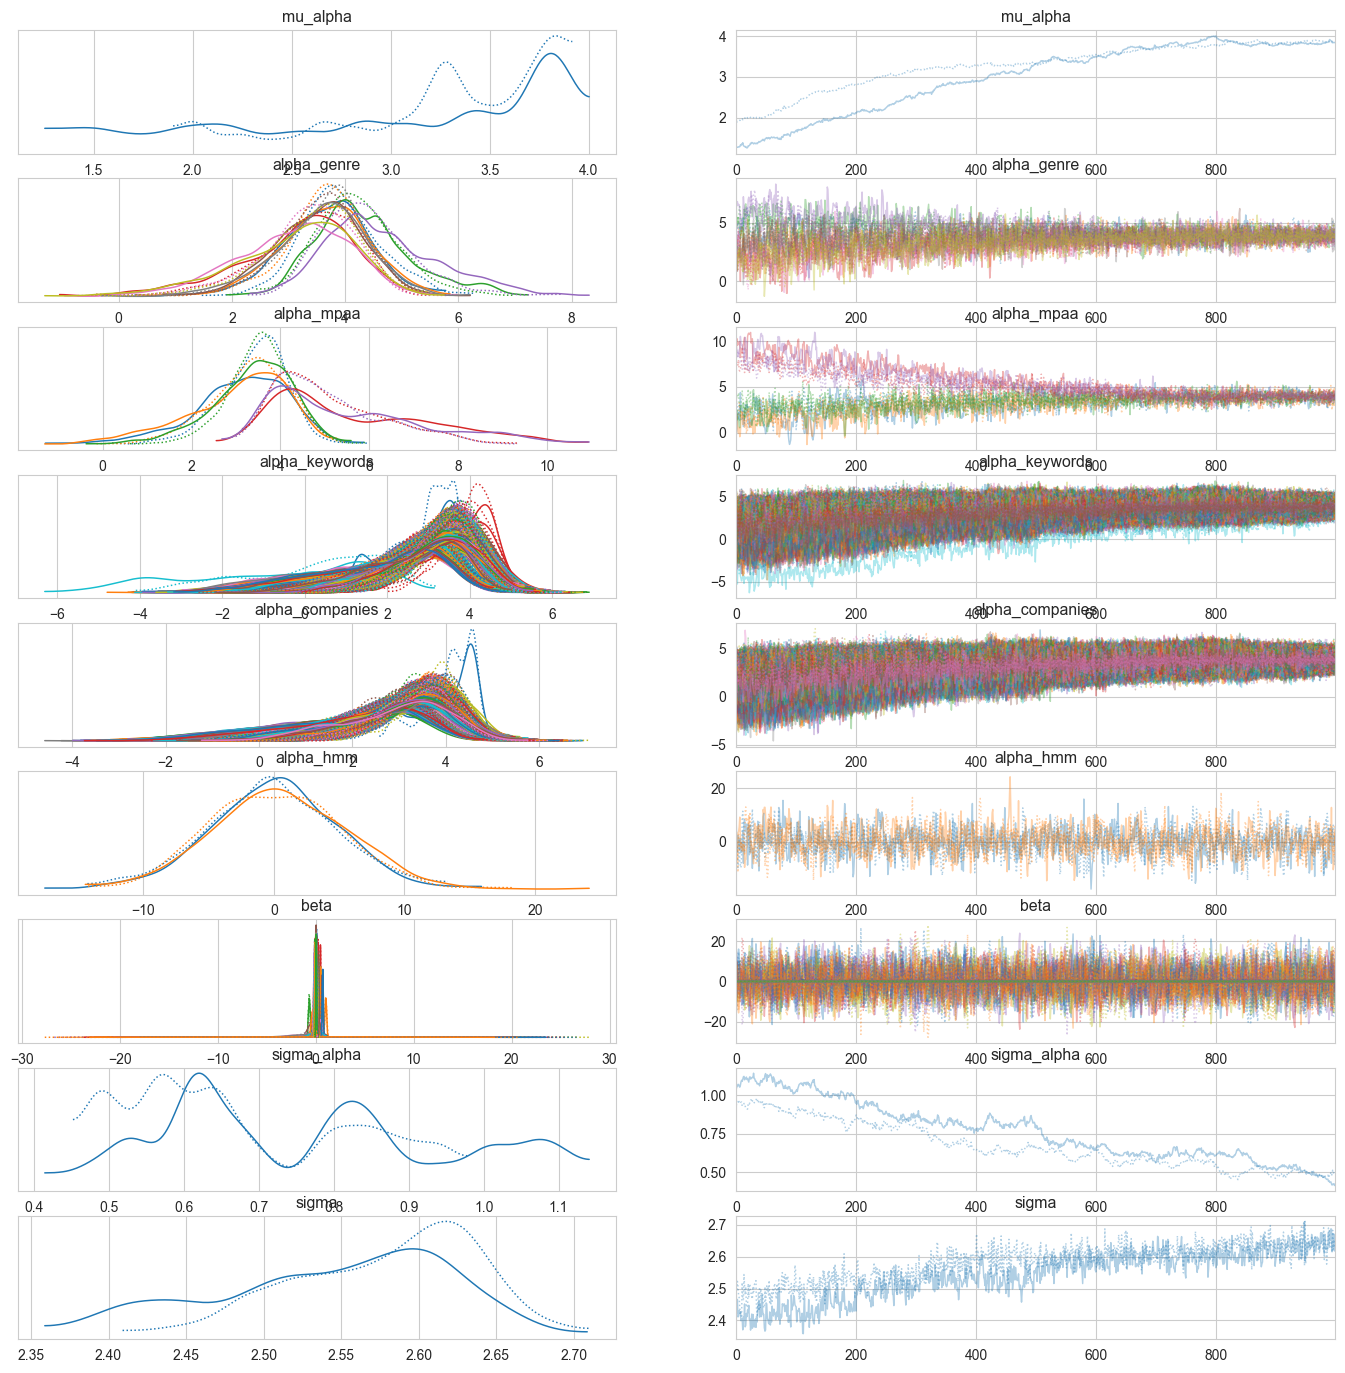

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu_alpha,3.14,0.71,1.77,4.00,0.43,0.16,2.77,10.96,1.94
alpha_genre[0],3.79,0.76,2.47,5.41,0.08,0.10,90.70,47.49,1.05
alpha_genre[1],3.65,0.75,2.21,5.04,0.08,0.07,143.30,794.71,1.04
alpha_genre[2],4.28,0.80,2.94,5.97,0.23,0.11,13.49,36.84,1.10
alpha_genre[3],3.23,0.98,1.35,4.95,0.39,0.14,6.63,33.92,1.21
...,...,...,...,...,...,...,...,...,...
beta[240],0.06,0.04,-0.02,0.14,0.00,0.00,900.10,956.68,1.00
beta[241],-0.01,0.04,-0.09,0.05,0.00,0.00,849.87,1122.85,1.00
beta[242],0.05,0.04,-0.02,0.12,0.00,0.00,808.98,945.17,1.00
sigma_alpha,0.72,0.18,0.46,1.06,0.11,0.03,2.83,11.12,1.90


In [55]:
import matplotlib.pyplot as plt
import arviz as az

az.plot_trace(trace, figsize=(17, 17))  # Adjust the size to fit all traces
plt.show()

az.summary(trace, round_to=2)


In [28]:
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt

# 固定随机种子，保证结果可重复
np.random.seed(42)

# 数据设置：假设有 5 个组，每组 20 个样本
n_groups = 5
group_size = 20
N = n_groups * group_size

# 真实参数
true_intercept = 1.0       # 全局截距
true_slope = 2.0           # 全局斜率
group_effect_std = 0.5     # 分组效应标准差

# 为每个组生成一个随机的截距偏移
group_effects = np.random.normal(0, group_effect_std, n_groups)

# 构造数据：每个数据点由其所在组决定截距，再加上 x 的线性关系和噪声
group_idx = np.repeat(np.arange(n_groups), group_size)
x = np.random.normal(0, 1, N)
noise_std = 0.5
y = true_intercept + group_effects[group_idx] + true_slope * x + np.random.normal(0, noise_std, N)


In [29]:
with hierarchical_model:
    posterior_predictive = pm.sample_posterior_predictive(trace, var_names=['y_obs'])

# 提取预测值
y_pred_samples = posterior_predictive.posterior_predictive["y_obs"].values

# 计算均值和标准差（不确定性）
y_pred_mean = y_pred_samples.mean(axis=0)
y_pred_std = y_pred_samples.std(axis=0)

print(f"预测均值: {y_pred_mean}")
print(f"预测标准差（不确定性）: {y_pred_std}")

Sampling: [y_obs]


Output()

预测均值: [[18.90200507 17.57253177 15.69716888 ... 15.07592484 12.85868113
   8.3972544 ]
 [16.25289502 17.69817899 14.00233501 ... 15.8665037  12.02937075
   7.79183287]
 [15.70204052 13.77752514 13.29252542 ... 15.12242395 12.66088998
   7.97927778]
 ...
 [15.78113543 16.54110922 16.2132852  ... 14.44506384 11.13042255
   9.77626043]
 [15.30714382 15.14691767 16.90973359 ... 12.69058762 12.54697183
   9.17942517]
 [19.69471653 18.54914163 17.10565591 ... 14.52053796  9.08193981
   8.7751204 ]]
预测标准差（不确定性）: [[1.91824033 0.27594966 0.57628534 ... 0.72205904 0.24745259 0.34243086]
 [2.06848377 0.05464784 3.23121121 ... 2.34928301 4.46153117 0.95131948]
 [1.77332707 2.00593229 0.77045985 ... 3.4027978  0.6739009  1.49112462]
 ...
 [1.11896518 1.50096789 2.12096868 ... 1.05302293 1.2171595  1.24820454]
 [0.16825662 4.62733264 1.39506824 ... 0.99631507 4.24905441 2.99353665]
 [4.47638626 1.69051503 1.35133782 ... 0.22111768 0.92530434 0.31765551]]


In [57]:
y_pred_samples.shape


(2, 1000, 6018)

In [59]:
y_pred_unlogged = np.exp(y_pred_samples)

In [45]:
y_pred_samples_flattened = y_pred_samples.reshape(-1, y_pred_samples.shape[2])


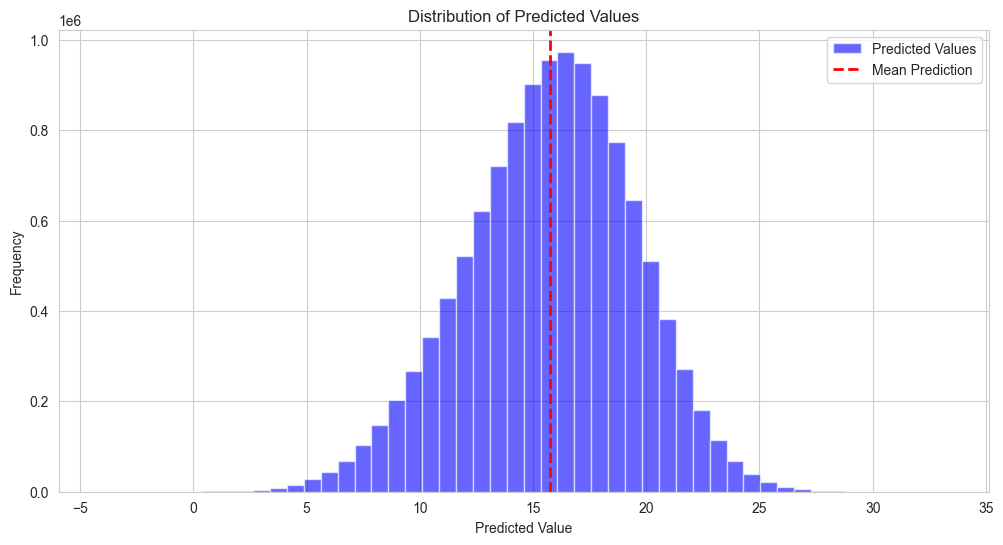

In [90]:
# Flatten the first two dimensions to aggregate all samples
y_pred_samples_flattened = y_pred_samples.reshape(-1, y_pred_samples.shape[2])

# Compute mean and standard deviation for each forecasted point
y_pred_mean = np.mean(y_pred_unlogged, axis=0)
y_pred_std = np.std(y_pred_samples_flattened, axis=0)

# Generate prediction intervals
y_pred_upper_1 = y_pred_mean + y_pred_std  # 1 standard deviation above
y_pred_lower_1 = y_pred_mean - y_pred_std  # 1 standard deviation below

y_pred_upper_2 = y_pred_mean + 2 * y_pred_std  # 2 standard deviations above
y_pred_lower_2 = y_pred_mean - 2 * y_pred_std  # 2 standard deviations below

# Generate x-axis indices
x_values = np.arange(len(y_pred_mean))

import matplotlib.pyplot as plt
import seaborn as sns
# Plot distribution of predicted values
plt.figure(figsize=(12, 6))
plt.hist(y_pred_samples_flattened.flatten(), bins=50, color="blue", alpha=0.6, label="Predicted Values")
plt.axvline(np.mean(y_pred_samples_flattened), color="red", linestyle="dashed", linewidth=2, label="Mean Prediction")
plt.xlabel("Predicted Value")
plt.ylabel("Frequency")
plt.title("Distribution of Predicted Values")
plt.legend()
plt.show()




In [74]:
# Average the predictions across the 2nd dimension (samples) and 3rd dimension (chains)
y_pred_unlogged_reshaped = y_pred_unlogged.mean(axis=(0, 1))

# Now, y_pred_unlogged_reshaped and y_actual have the same shape



In [96]:
y_actual2=df['Worldwide Gross (USD)']


In [101]:
y_actual2
y_pred_samples = y_pred_samples.mean(axis=(0, 1))


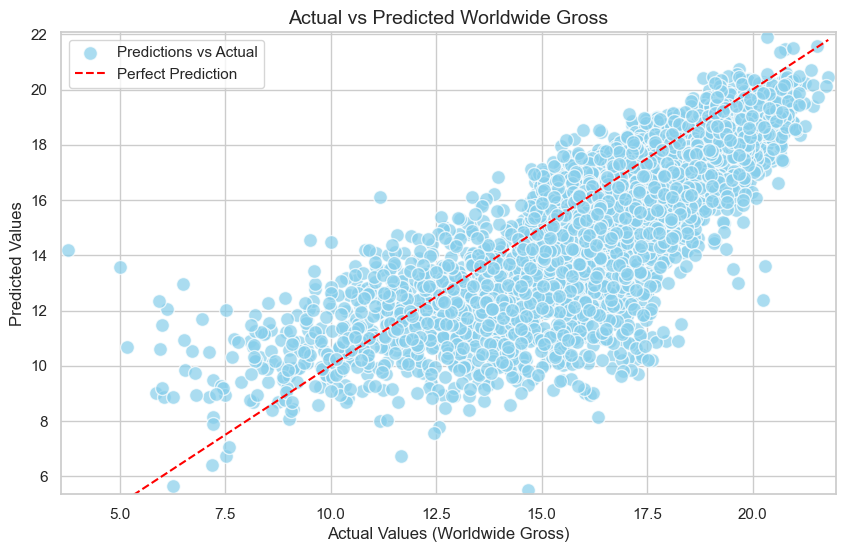

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_actual2, y_pred_samples, color='skyblue', alpha=0.7, edgecolors='w', s=100, label="Predictions vs Actual")

# Plot the perfect prediction line
plt.plot([min(y_actual2), max(y_actual2)], [min(y_actual2), max(y_actual2)], color='red', linestyle='--', label="Perfect Prediction")

x_margin = 0.01  # 1% margin for the x-axis
y_margin = 0.01  # 1% margin for the y-axis

# Calculate the min and max values with the margins
x_min, x_max = min(y_actual2), max(y_actual2)
y_min, y_max = min(y_pred_samples), max(y_pred_samples)

# Apply the margin to the limits
plt.xlim(x_min - x_margin * (x_max - x_min), x_max + x_margin * (x_max - x_min))
plt.ylim(y_min - y_margin * (y_max - y_min), y_max + y_margin * (y_max - y_min))

# Labels and title
plt.xlabel('Actual Values (Worldwide Gross)', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title('Actual vs Predicted Worldwide Gross', fontsize=14)

# Add grid for easier visualization
plt.grid(True)

# Display legend
plt.legend()

# Show plot
plt.show()